In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [10]:
#数据预处理
obj = (dataset.dtypes == 'object') 
object_cols = list(obj[obj].index) 
print("categorical variables:",len(object_cols)) 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

categorical variables: 4
Integer variables: 0
Float variables: 3


<Axes: >

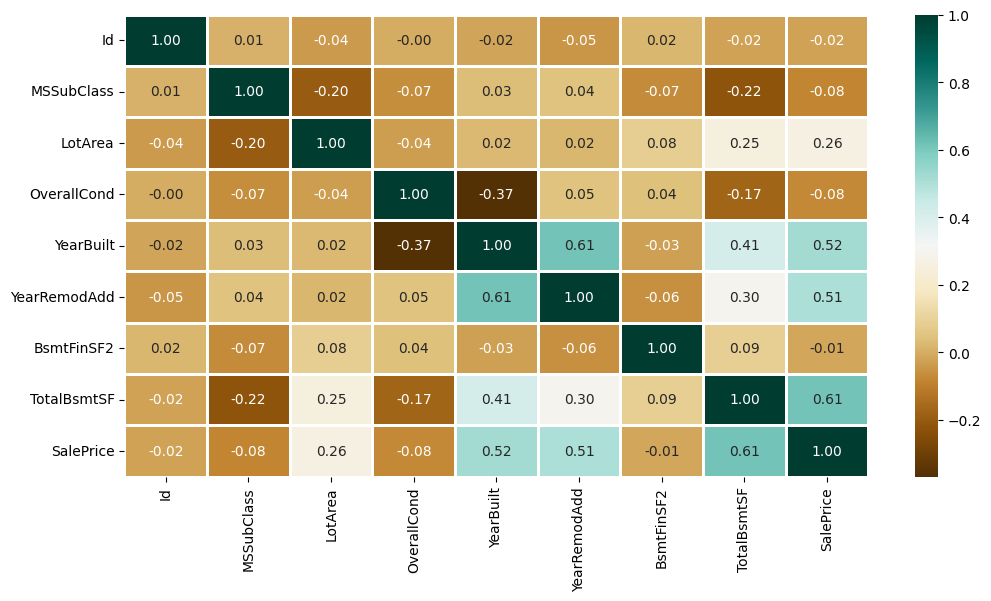

In [11]:
#探索数据分析
#eda  数据进行深入分析，不同的模式和发现异常
numerical_dataset = dataset.select_dtypes(include=['number']) 
plt.figure(figsize=(12,6)) 
sns.heatmap(numerical_dataset.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True) 


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

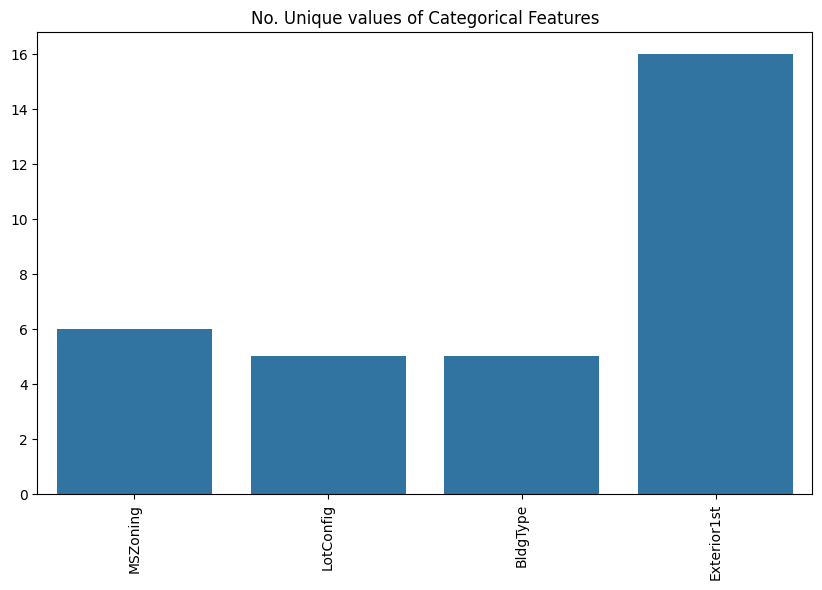

In [12]:
unique_values = [] 
for col in object_cols:
    unique_values.append(dataset[col].unique().size) 
plt.figure(figsize=(10,6)) 
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

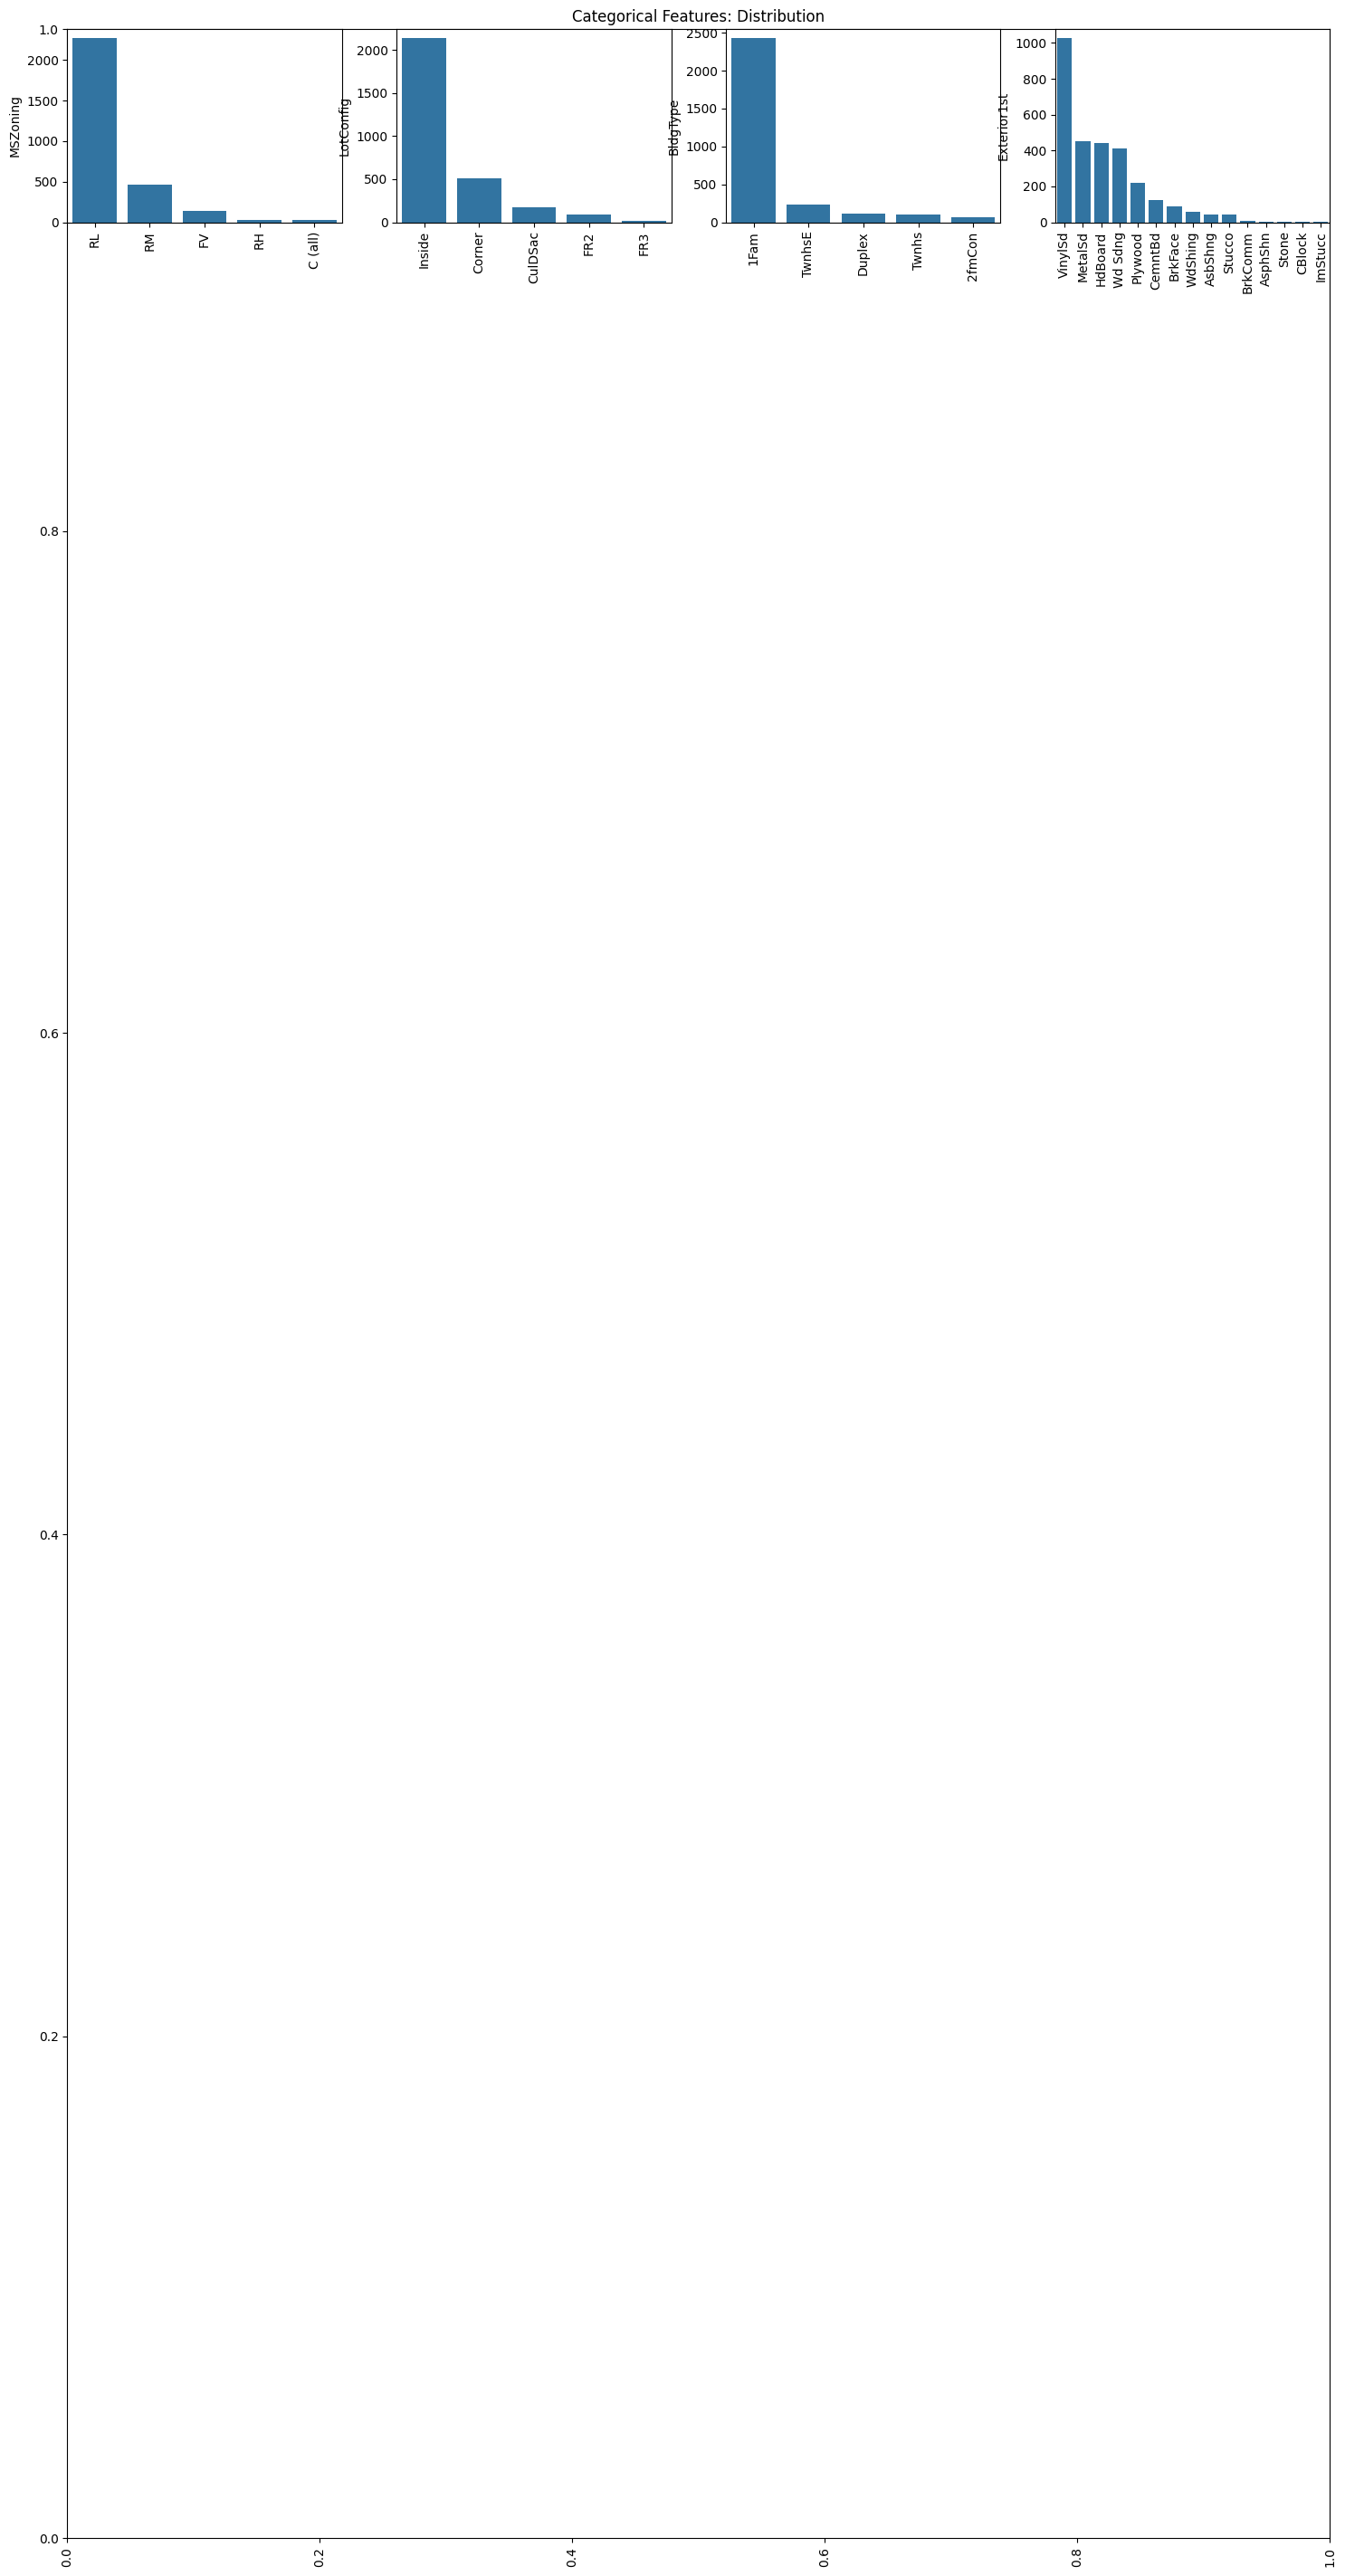

In [13]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [15]:
#数据清理，数据或删除不正确、损坏或不想相关的数据
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 

In [16]:
new_dataset = dataset.dropna()

In [17]:
new_dataset.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [18]:
#onehotencoder 标签分类特征
from sklearn.preprocessing import OneHotEncoder 
s = (new_dataset.dtypes == 'object') 
object_cols = list(s[s].index) 
print("categorical Variables") 
print(object_cols) 
print("No. of. categorical features:",len(object_cols))

categorical Variables
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features: 4


In [23]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [25]:
#svm
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18704778826125987


In [26]:
#随机森林回归 
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.08164400076583804

In [27]:
#线性回归 
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18633155158087458


In [30]:
#CatBoost 分类器 
# This code is contributed by @amartajisce
#pip install catboost # install the catboost package
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

# This code is modified by Susobhan Akhuli


Learning rate set to 0.046797
0:	learn: 55858.4377716	total: 149ms	remaining: 2m 28s
1:	learn: 54549.6738251	total: 153ms	remaining: 1m 16s
2:	learn: 53194.6163146	total: 155ms	remaining: 51.6s
3:	learn: 52019.1348408	total: 160ms	remaining: 39.7s
4:	learn: 50821.2323253	total: 163ms	remaining: 32.3s
5:	learn: 49729.4388396	total: 165ms	remaining: 27.3s
6:	learn: 48728.8850805	total: 168ms	remaining: 23.9s
7:	learn: 47843.2737463	total: 174ms	remaining: 21.6s
8:	learn: 46753.9666335	total: 178ms	remaining: 19.6s
9:	learn: 45775.4479191	total: 181ms	remaining: 17.9s
10:	learn: 44954.7325349	total: 185ms	remaining: 16.6s
11:	learn: 44098.7182761	total: 189ms	remaining: 15.6s
12:	learn: 43225.8648186	total: 193ms	remaining: 14.6s
13:	learn: 42430.6865961	total: 196ms	remaining: 13.8s
14:	learn: 41719.8701086	total: 199ms	remaining: 13.1s
15:	learn: 41130.2588022	total: 202ms	remaining: 12.4s
16:	learn: 40498.3072297	total: 207ms	remaining: 12s
17:	learn: 39806.6880976	total: 212ms	remaini

0.7906929139689325